In [1]:
import numpy as np
from matplotlib import pyplot as plt

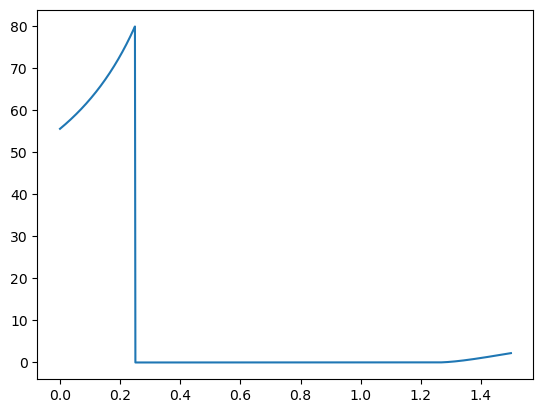

In [44]:
h = np.linspace(0.0,1.5,1000)
margin = 0.5
gain = 10.0
ref = 0.75

js = []
for x in h:
  if abs(x-ref) > margin:
    j = gain * 0.5 * (1/(x-ref) - 1/margin)**2
    js.append(j)
  else:
    js.append(0)

plt.plot(h,js)


Text(0.5, 0.98, 'Altitude Heuristics vs Margin Size')

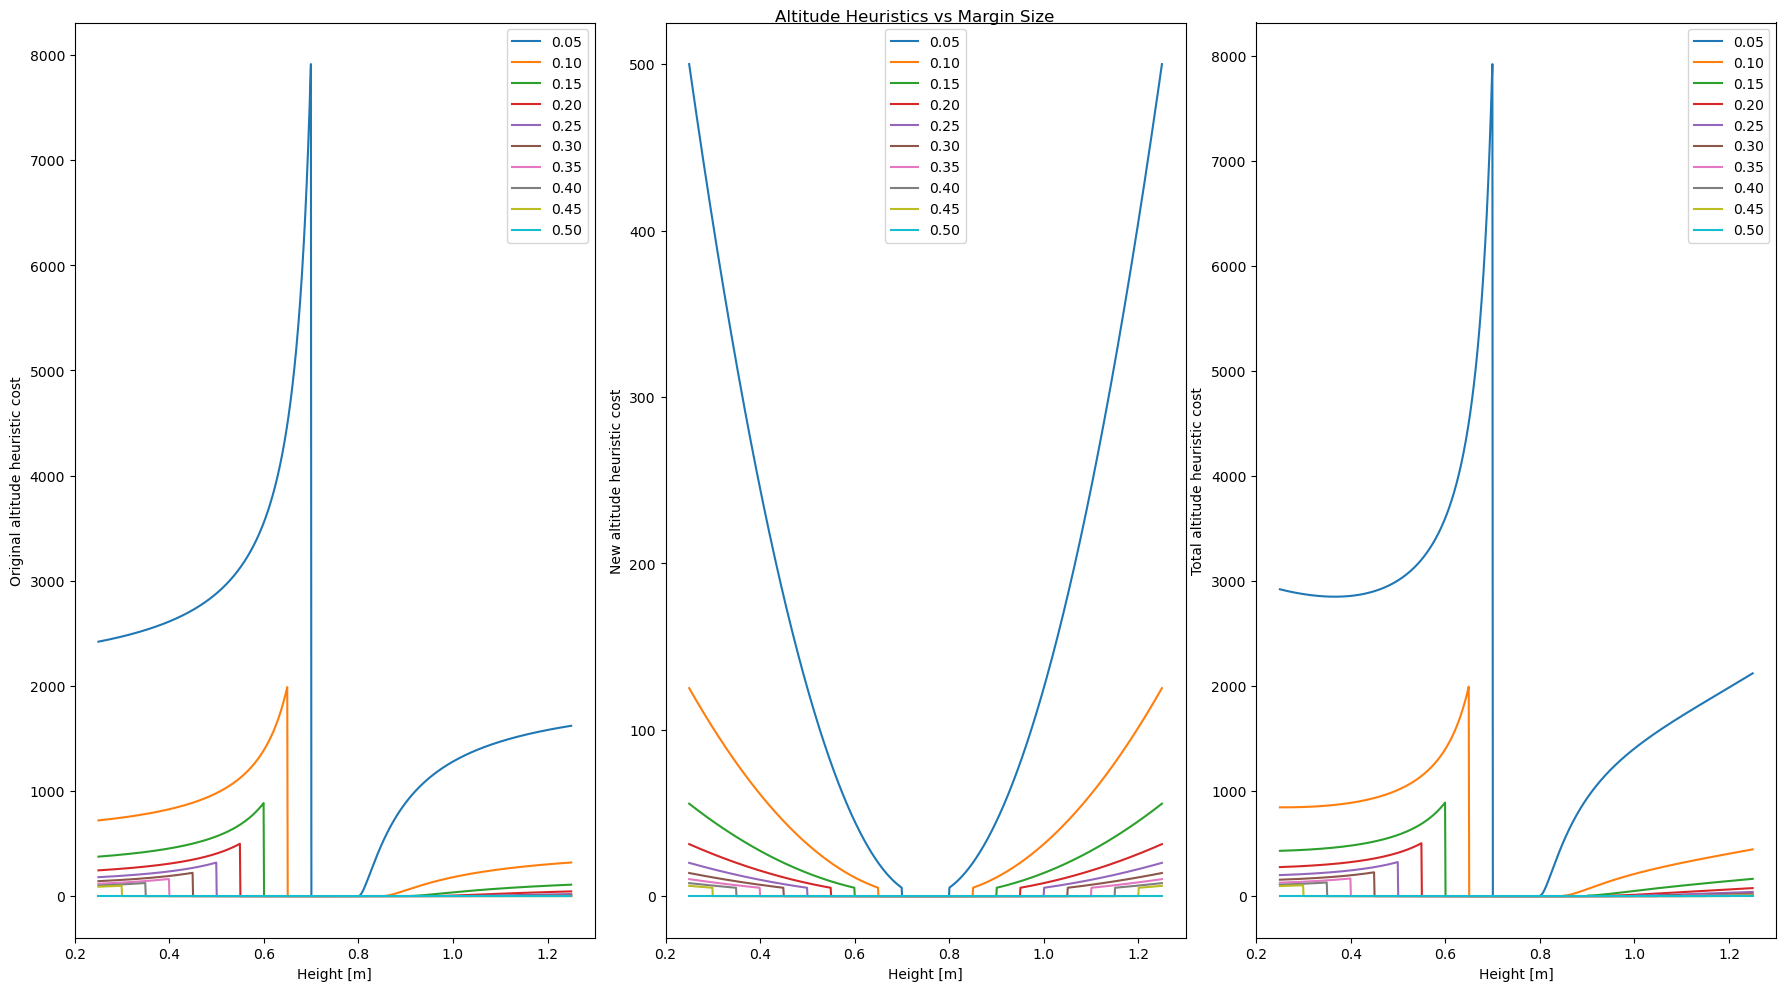

In [54]:
h = np.linspace(0.25,1.25,1000)
margins = np.linspace(0.05,0.5,10)
gain = 10.0
ref = 0.75
err = h - ref
k_sum = 1

j_originals = []
j_news = []
j_sums = []

fig, axs = plt.subplots(figsize=(18, 10),nrows=1,ncols=3)
fig.tight_layout(pad=2)

for margin in margins:
  j_values_original = gain * 0.5 * (1/err - 1/margin)**2
  j_values_new = gain * 0.5 * (err/margin)**2

  j_original = np.where(
    abs(err) > margin,
    j_values_original,
    np.zeros_like(h)
  )
  j_new = np.where(
    abs(err) > margin,
    j_values_new,
    np.zeros_like(h)
  )

  j_sum = j_original + j_new*k_sum

  j_originals.append(j_original)
  j_news.append(j_new)
  j_sums.append(j_sum)

  axs[0].plot(h,j_original, label='{:.2f}'.format(margin))
  axs[1].plot(h,j_new, label='{:.2f}'.format(margin))
  axs[2].plot(h,j_sum, label='{:.2f}'.format(margin))
axs[0].set_xlabel("Height [m]")
axs[0].set_ylabel("Original altitude heuristic cost")
axs[1].set_xlabel("Height [m]")
axs[1].set_ylabel("New altitude heuristic cost")
axs[2].set_xlabel("Height [m]")
axs[2].set_ylabel("Total altitude heuristic cost")
axs[0].legend()
axs[1].legend()
axs[2].legend()
fig.suptitle("Altitude Heuristics vs Margin Size")

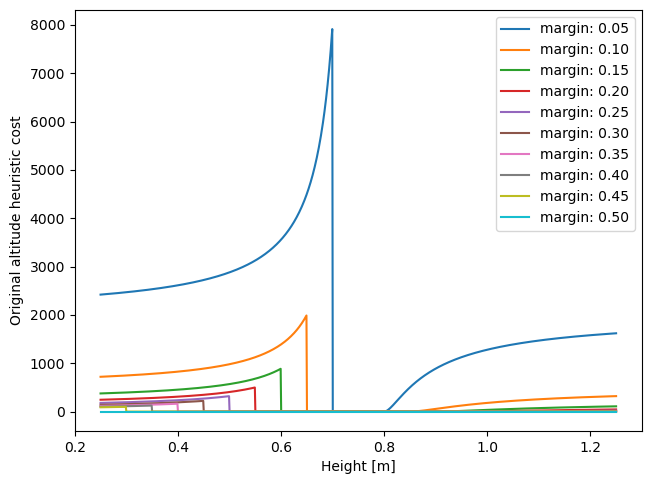

In [24]:
h = np.linspace(0.25,1.25,1000)
margins = np.linspace(0.05,0.5,10)
gain = 10.0
ref = 0.75
err = h - ref

j_originals = []
j_news = []

fig, axs = plt.subplots(nrows=1,ncols=1)
fig.tight_layout(h_pad=2)

for margin in margins:
  j_values_original = gain * 0.5 * (1/err - 1/margin)**2
  j_values_new = gain * 0.5 * (err/margin)**2

  j_original = np.where(
    abs(err) > margin,
    j_values_original,
    np.zeros_like(h)
  )
  j_new = np.where(
    abs(err) > margin,
    j_values_new,
    np.zeros_like(h)
  )

  j_originals.append(j_original)
  j_news.append(j_new)

  axs.plot(h,j_original, label='margin: {:.2f}'.format(margin))
  # axs[1].plot(h,j_new, label='{:.2f}'.format(margin))
axs.set_xlabel("Height [m]")
axs.set_ylabel("Original altitude heuristic cost")
# axs[1].set_xlabel("Height [m]")
# axs[1].set_ylabel("New altitude heuristic cost")
axs.legend()
# axs[1].legend()

Text(0, 0.5, 'Original altitude heuristic cost')

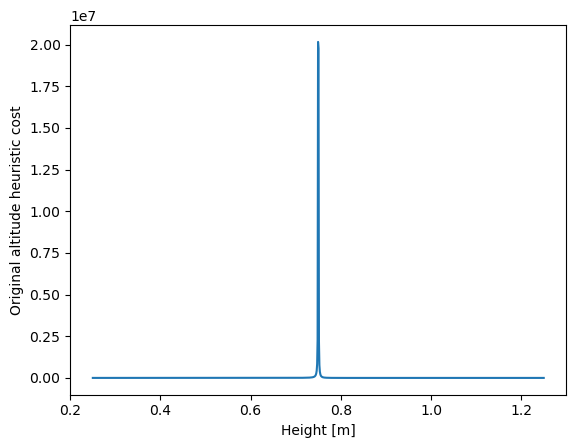

In [12]:
plt.plot(h,j_values_original)
plt.xlabel("Height [m]")
plt.ylabel("Original altitude heuristic cost")

Text(0, 0.5, 'New altitude heuristic cost')

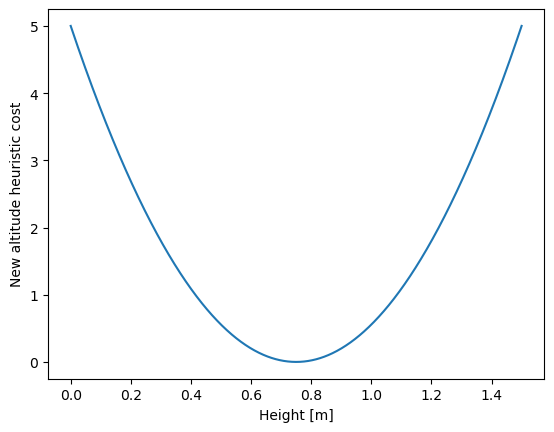

In [47]:
plt.plot(h,j_values_new)
plt.xlabel("Height [m]")
plt.ylabel("New altitude heuristic cost")

Text(0, 0.5, 'New altitude heuristic cost')

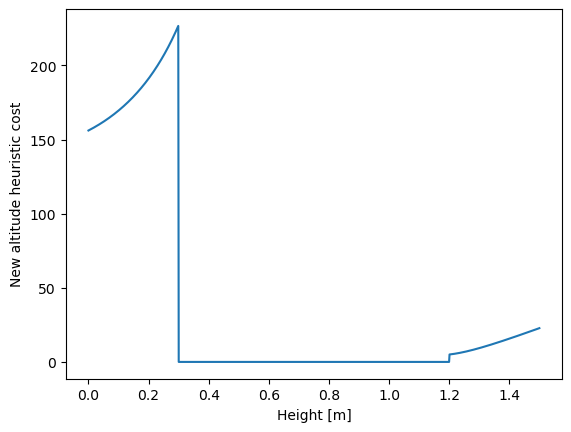

In [50]:
plt.plot(h,j_sums[5])
plt.xlabel("Height [m]")
plt.ylabel("New altitude heuristic cost")